In [420]:
# To do:
# Fix Dates, must be another published on vs premiered on discrepancy -- OK
# Fix Titles -- OK
# Looks like missing one (1) video for Gibi 344/345 -- OK
# DUPLICATES -- OK
# EDGE CASES ▶ -- OK
# User entered date range --
# Better commenting --
# Duration --

# Import Dependencies
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', 500)

In [421]:
converted_date = ""
raw_months = {"Jan": 1, "Feb": 2, "Mar" : 3, "Apr" : 4, 
              "May" : 5, "Jun" : 6, "Jul" : 7, "Aug" : 8,
              "Sep" : 9, "Oct" : 10, "Nov" : 11, "Dec" : 12}

# Convert Date from Jan 1, 1999 format to datetime object
def convertDate(raw_date):
    
    converted_date = ""
    
    number_month = raw_months.get(raw_date[0])
    
    date_str = (str(number_month) + "/" + raw_date[1] + "/" + raw_date[2]).replace(",", "")
    
    converted_date = datetime.strptime(date_str, '%m/%d/%Y')
    
    return converted_date

In [422]:
# Get Youtuber's Name
input_name = input("Enter Youtuber's Name: ")

list_name = input_name.split()

converted_name = input_name

if len(list_name) > 1:
    
    converted_name = ""
    
    for i in range(len(list_name)):

        converted_name = converted_name + list_name[i]
        
        if i != len(list_name)-1:
            converted_name = converted_name + "+"

search_name = converted_name

start_url = "https://www.youtube.com/results?search_query=" + search_name

Enter Youtuber's Name: raffy taffy asmr


In [423]:
print(start_url)
get_youtube_url_response = requests.get(start_url)

https://www.youtube.com/results?search_query=raffy+taffy+asmr


In [424]:
youtube_name_soup = bs(get_youtube_url_response.text, "lxml")

In [425]:
raw_youtube_name_link = youtube_name_soup.find_all("div", class_="yt-lockup-byline")[0].a.get("href")

videos_link = "https://www.youtube.com" + raw_youtube_name_link + "/videos"

about_link = "https://www.youtube.com" + raw_youtube_name_link + "/about"

print(videos_link)
print(about_link)

https://www.youtube.com/channel/UCMWQbdU4kjCB49xkuQ8nYRw/videos
https://www.youtube.com/channel/UCMWQbdU4kjCB49xkuQ8nYRw/about


In [426]:
# Get About Information
about_html = requests.get(about_link)

# Parse HTML
about_soup = bs(about_html.text, "lxml")

In [427]:
# Artist Information
artist_name = about_soup.find("meta", property="og:title").get("content")

subscribers = about_soup.find_all("span", class_="about-stat")[0].text
subscribers_int = int(subscribers.split(" ")[0].replace(",",""))

total_views = about_soup.find_all("span", class_="about-stat")[1].text
total_views_int = int(total_views[3:len(total_views)].split(" ")[0].replace(",",""))

joined = about_soup.find_all("span", class_="about-stat")[2].text
joined_temp = joined.split(" ")[1:4]
joined_convert = convertDate(joined_temp)

print(f"Artist: {artist_name}")
print(f"Subscribers: {subscribers_int}")
print(f"Views: {total_views_int}")
print(f"Joined: {joined_convert}")

Artist: RaffyTaphyASMR
Subscribers: 455721
Views: 78430467
Joined: 2015-09-14 00:00:00


In [428]:
# Convert User Name to UU Format
youtube_code = raw_youtube_name_link.split("/")[2]

if youtube_code[0:2] == "UC":
    
    youtube_code = raw_youtube_name_link.split("/")[2]

    playlist_link = "https://www.youtube.com" + "/playlist?list=UU" + youtube_code[2:] 

elif youtube_code[0:2] != "UC":
    
    youtube_code_raw = about_soup.find("link", rel="canonical").get("href")
    
    youtube_code = youtube_code_raw.split("/")[4]
    
    playlist_link = "https://www.youtube.com" + "/playlist?list=UU" + youtube_code[2:]  
    

print(playlist_link)

https://www.youtube.com/playlist?list=UUMWQbdU4kjCB49xkuQ8nYRw


In [429]:
# Get Playlist Response
playlist_response = requests.get(playlist_link)

In [430]:
# Create Playlist Soup Object
playlist_soup = bs(playlist_response.text, 'lxml')

In [431]:
# Get First Video URL as Starting Point
first_video = "https://www.youtube.com" + playlist_soup.find_all("a", class_="pl-video-title-link")[0].get("href").split("&")[0]
first_video_within_playlist = first_video + "&" + playlist_link.split("?")[1]

print(first_video_within_playlist)

https://www.youtube.com/watch?v=YIJqsetE-y0&list=UUMWQbdU4kjCB49xkuQ8nYRw


In [432]:
# Create Soup Object for First Video Inside Playlist
playlist_inside_request = requests.get(first_video_within_playlist) 

playlist_inside_soup = bs(playlist_inside_request.text, "lxml")

In [433]:
urls_all = []
total_videos_in_playlist = int(playlist_inside_soup.find("span", id="playlist-length").text.replace(" videos","").replace(",",""))
number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) 
last_video_index = int(playlist_inside_soup.find_all("span", class_="index")[-1].text.replace("\n        ","").replace("\n    ",""))
last_shown_link = playlist_inside_soup.find_all("span", class_="index")[-1].find_next("a").get("href")
link_fix = "https://www.youtube.com" + last_shown_link
    
for i in range(total_videos_in_playlist):   

    if i == 0:
        
        print(f"loop1, i={i}")
        
        first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        ▶\n    ")
        
        url = "https://www.youtube.com" + first_link.find_next("a").get("href")
        
        original_url = url.split("&")[0]

        urls_all.append(original_url)
        
        next_link = first_link
        
    elif i == last_video_index:

        print(f"loop2, i={i}------------------------------------------------")
        
        playlist_inside_request = requests.get(link_fix)
        
        playlist_inside_soup = bs(playlist_inside_request.text, "lxml")
        
        last_shown_link = playlist_inside_soup.find_all("span", class_="index")[-1].find_next("a").get("href")
        
        link_fix = "https://www.youtube.com" + last_shown_link
        
        last_video_index = int(playlist_inside_soup.find_all("span", class_="index")[-1].text.replace("\n        ","").replace("\n    ",""))
        
        first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {i+1}\n    ")

        if first_link is None:
            
            next_link = playlist_inside_soup.find("span", class_="index", text=f"\n        ▶\n    ")
            
        else:
            
            next_link = first_link
        
        next_url = "https://www.youtube.com" + next_link.find_next("a").get("href")
        
        original_url = next_url.split("&")[0]
        
        urls_all.append(original_url)
        
        number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) - 1
              
    else:
        
        print(f"loop3, i={i}")
 
        if i == 1:

            first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        ▶\n    ")
            
        elif playlist_inside_soup.find("span", class_="index", text=f"\n        {i}\n    ") is None:
            
            first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        ▶\n    ")
        
        else:
        
            first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {i}\n    ")
            
#         print(f"{first_link}")

        next_link = first_link
        
#         print(f"{next_link}")

        next_link = next_link.find_next("span", class_="index")

        next_url = "https://www.youtube.com" + next_link.find_next("a").get("href")

        original_url = next_url.split("&")[0]

        urls_all.append(original_url)


loop1, i=0
loop3, i=1
loop3, i=2
loop3, i=3
loop3, i=4
loop3, i=5
loop3, i=6
loop3, i=7
loop3, i=8
loop3, i=9
loop3, i=10
loop3, i=11
loop3, i=12
loop3, i=13
loop3, i=14
loop3, i=15
loop3, i=16
loop3, i=17
loop3, i=18
loop3, i=19
loop3, i=20
loop3, i=21
loop3, i=22
loop3, i=23
loop3, i=24
loop3, i=25
loop3, i=26
loop3, i=27
loop3, i=28
loop3, i=29
loop3, i=30
loop3, i=31
loop3, i=32
loop3, i=33
loop3, i=34
loop3, i=35
loop3, i=36
loop3, i=37
loop3, i=38
loop3, i=39
loop3, i=40
loop3, i=41
loop3, i=42
loop3, i=43
loop3, i=44
loop3, i=45
loop3, i=46
loop3, i=47
loop3, i=48
loop3, i=49
loop3, i=50
loop3, i=51
loop3, i=52
loop3, i=53
loop3, i=54
loop3, i=55
loop3, i=56
loop3, i=57
loop3, i=58
loop3, i=59
loop3, i=60


In [434]:
# Going to Each Video and Extracting Data
published_on = []
raw_published_on = []
views = []
date = []
duration_videos = []
likes = []
dislikes = []
title_videos = []
categories = []

for i in range(len(urls_all)):
    
    video_url = urls_all[i]
    video_response = requests.get(video_url)
    video_soup = bs(video_response.text, 'lxml')
    
    # Title
    title = video_soup.find("title").text.replace(" - YouTube", "")
    title_videos.append(title)
    
    # Views
    string_views = video_soup.find("div", id="watch7-views-info").text.replace(" views", "").replace(",","").replace("\n","")
    int_views = int(string_views)
    views.append(int_views)
    
#     # Duration
#     duration = video_soup.find("span", class_="video-time").text
#     duration_videos.append(duration)
    
    # Likes
    string_likes = video_soup.find("button", title="I like this").text
    if string_likes != "":
        int_likes = int(string_likes.replace(",",""))
        likes.append(int_likes)
    else:
        likes.append(0)
    
    # Dislikes
    string_dislikes = video_soup.find("button", title="I dislike this").text
    if string_dislikes != "":
        int_dislikes = int(string_dislikes.replace(",",""))
        dislikes.append(int_dislikes)
    else:
        dislikes.append(0)
    
    # Publish Date
    raw_publish_date = video_soup.find("div", id="watch-uploader-info").text
    raw_published_on.append(raw_publish_date)
    
    # Handle All Raw Dates "Premiered", ""Published", "Streamed"
    publish_date_format = raw_publish_date.split(" ")[len(raw_publish_date.split(" "))-3:len(raw_publish_date.split(" "))]
    publish_date_convert = convertDate(publish_date_format)
    published_on.append(publish_date_convert)
    
    # Category
    category = video_soup.find("h4", class_="title", text="\n      Category\n    ").find_next("a").text
    categories.append(category)
    
    print(f"({i+1}/{len(urls_all)})")

(1/61)
(2/61)
(3/61)
(4/61)
(5/61)
(6/61)
(7/61)
(8/61)
(9/61)
(10/61)
(11/61)
(12/61)
(13/61)
(14/61)
(15/61)
(16/61)
(17/61)
(18/61)
(19/61)
(20/61)
(21/61)
(22/61)
(23/61)
(24/61)
(25/61)
(26/61)
(27/61)
(28/61)
(29/61)
(30/61)
(31/61)
(32/61)
(33/61)
(34/61)
(35/61)
(36/61)
(37/61)
(38/61)
(39/61)
(40/61)
(41/61)
(42/61)
(43/61)
(44/61)
(45/61)
(46/61)
(47/61)
(48/61)
(49/61)
(50/61)
(51/61)
(52/61)
(53/61)
(54/61)
(55/61)
(56/61)
(57/61)
(58/61)
(59/61)
(60/61)
(61/61)


In [435]:
# Create DataFrame
df = pd.DataFrame({"Artist" : artist_name,
                   "Joined" : joined_convert,
                   "Subscribers" : subscribers_int,
                   "Total Views" : total_views_int,
                   "Date": published_on,
                   "Title" : title_videos,
                   "Category" : categories,
                   #"Duration" : duration_videos,
                   "Views" : views,
                   "Likes" : likes,
                   "Dislikes" : dislikes,
                   "URL" : urls_all,
                  })

# df = df.sort_values("Date",ascending=False).reindex()
df.to_csv(f"{artist_name}_scrape.csv")
df

,Artist,Joined,Subscribers,Total Views,Date,Title,Category,Views,Likes,Dislikes,URL
0,RaffyTaphyASMR,2015-09-14,455721,78430467,2018-12-02,ASMR blue yeti sound assortment,Entertainment,934243,28644,578,https://www.youtube.com/watch?v=YIJqsetE-y0
1,RaffyTaphyASMR,2015-09-14,455721,78430467,2018-11-18,ASMR a bit of tapping,Entertainment,914634,31364,421,https://www.youtube.com/watch?v=KpEXHng76ZE
2,RaffyTaphyASMR,2015-09-14,455721,78430467,2018-11-11,ASMR s words are the best words,Entertainment,1468518,43824,703,https://www.youtube.com/watch?v=j0-UxxK7y1k
3,RaffyTaphyASMR,2015-09-14,455721,78430467,2018-11-04,ASMR this is a test,Entertainment,1332929,61027,543,https://www.youtube.com/watch?v=2eraHUjOaD4
4,RaffyTaphyASMR,2015-09-14,455721,78430467,2018-01-04,ASMR 300k old school webcam sound assortment,Entertainment,2113918,35759,859,https://www.youtube.com/watch?v=3nN2o24fA5k
5,RaffyTaphyASMR,2015-09-14,455721,78430467,2017-12-18,ASMR welcome back sound assortment,Entertainment,6667066,94768,3395,https://www.youtube.com/watch?v=VUj_P0AELoo
6,RaffyTaphyASMR,2015-09-14,455721,78430467,2017-05-25,ASMR little boxes,Entertainment,2823952,44208,1038,https://www.youtube.com/watch?v=0CPLxgV_KVE
7,RaffyTaphyASMR,2015-09-14,455721,78430467,2017-04-06,ASMR tapping,Entertainment,13051297,116522,4193,https://www.youtube.com/watch?v=3x5PzivPJ3Q
8,RaffyTaphyASMR,2015-09-14,455721,78430467,2017-03-05,ASMR good sounds with stress cube,Entertainment,3578998,47465,2074,https://www.youtube.com/watch?v=2y6AdnmKk5Y
9,RaffyTaphyASMR,2015-09-14,455721,78430467,2017-02-21,intentions matter,Entertainment,395701,16446,377,https://www.youtube.com/watch?v=NrF7vrRE-g0


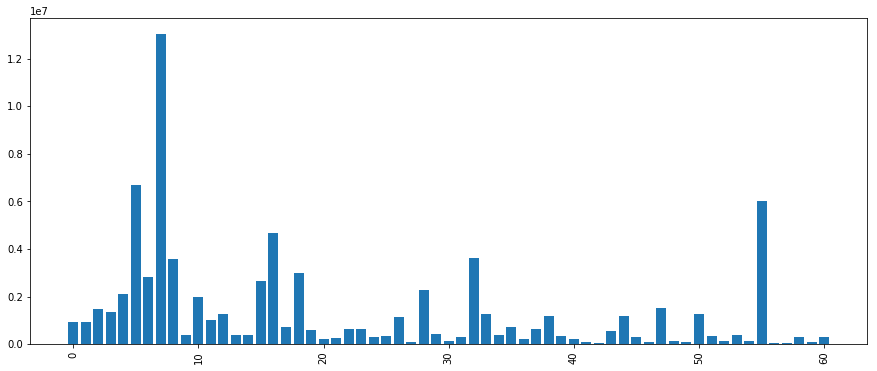

In [436]:
# Graph Data
#plt.bar(np.arange(0,len(df),1),df["Views"], tick_label = df["Date"])
plt.bar(np.arange(0,len(df),1),df["Views"])
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [15,6]